In [1]:
import pandas as pd
from datetime import datetime, timedelta
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.exporter.xes import exporter as xes_exporter

import os

# Set path manually to Graphviz's dot command
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"



In [2]:

# Define traces
trace_1 = ['a', 'b', 'c', 'e']
trace_2 = ['a', 'c', 'b', 'e']
trace_3 = ['a', 'd', 'e']

start_time = datetime(2025, 1, 1, 8, 0, 0)
delta = timedelta(minutes=1)
case_id = 1

log_data = []

# Generate 10, 5, and 1 traces
for _ in range(10):
    time = start_time
    for act in trace_1:
        log_data.append({"case_id": case_id, "activity": act, "timestamp": time})
        time += delta
    case_id += 1
    start_time += timedelta(hours=1)

for _ in range(5):
    time = start_time
    for act in trace_2:
        log_data.append({"case_id": case_id, "activity": act, "timestamp": time})
        time += delta
    case_id += 1
    start_time += timedelta(hours=1)

for _ in range(1):
    time = start_time
    for act in trace_3:
        log_data.append({"case_id": case_id, "activity": act, "timestamp": time})
        time += delta
    case_id += 1
    start_time += timedelta(hours=1)

df = pd.DataFrame(log_data)

# Convert to EventLog
log = EventLog()
for cid in df['case_id'].unique():
    trace_df = df[df['case_id'] == cid]
    trace = Trace()
    for _, row in trace_df.iterrows():
        event = Event()
        event["concept:name"] = row["activity"]
        event["time:timestamp"] = row["timestamp"]
        trace.append(event)
    log.append(trace)

# Alpha Miner for Petri Net
net, initial_marking, final_marking = alpha_miner.apply(log)



In [3]:
# Visualize
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
# net, initial_marking, final_marking

In [4]:
# pn_visualizer.view(gviz)
gviz.render('my_petri_net', format='png', cleanup=True)



'my_petri_net.png'

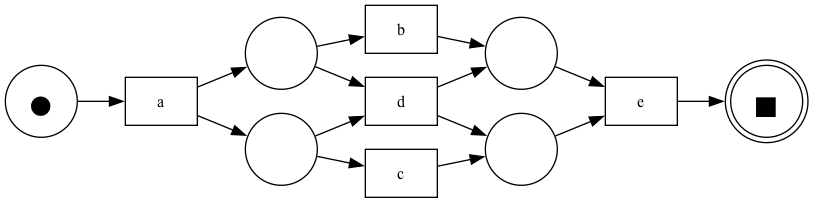

In [8]:
pn_visualizer.view(gviz)


In [5]:
# Re-run the necessary setup after kernel reset
df = pd.DataFrame(log_data)
df_path = "alpha_log.csv"
df.to_csv(df_path, index=False)

df_path


'alpha_log.csv'

In [6]:
# Export to XES
xes_exporter.apply(log, "event_log.xes")
print("XES file saved as event_log.xes")


exporting log, completed traces ::   0%|          | 0/16 [00:00<?, ?it/s]

XES file saved as event_log.xes


In [10]:
import pm4py.discovery as discovery
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer


In [11]:
# bpmn_model = bpmn_discovery.apply(log)
bpmn_model = discovery.discover_bpmn_inductive(log)

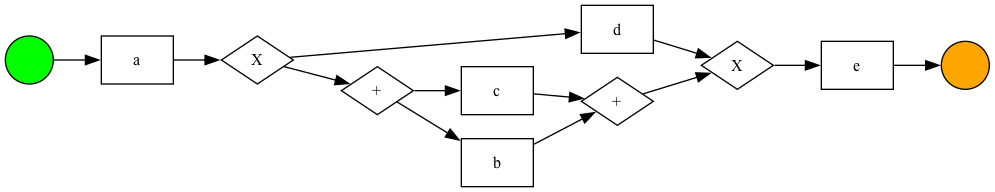

In [12]:
bpmn_vis = bpmn_visualizer.apply(bpmn_model)
bpmn_visualizer.view(bpmn_vis)


In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# net, initial_marking, final_marking = inductive_miner.apply(log)

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
import os
import shutil

# Manually append Graphviz's path
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

# Check if it now sees `dot`
print("dot found at:", shutil.which("dot"))


dot found at: None


In [ ]:
os.pathsep

':'